In [1]:
import tskit_arg_visualizer as argviz
import json
from jupyterquiz import display_quiz

# This could be put into a module so it can be loaded in one line
from IPython.display import HTML
class Workbook:
    @staticmethod
    def setup():
        display(HTML(
            "<style type='text/css'>"
            ".exercise {background-color: yellow; font-family: 'serif'; font-size: 1.2em}"
            ".exercise code {font-size: 0.7em}"
            "</style>"))

    def node_coalescence_status(arg):
        """
        Uses the num_children_array attribute to find nodes that represent local coalescence.
        See https://tskit.dev/tskit/docs/latest/python-api.html#tskit.Tree.num_children_array
        Returns an array of length num_nodes containing 0 if a node never has any coalescent
        segments, 1 if some segments of the node are coalescent and some unary, and 2 if
        all node segments represent a local coalescence point.
        """
        has_unary = np.zeros(arg.num_nodes + 1, dtype=int)
        has_coal = np.zeros(arg.num_nodes + 1, dtype=int)
        for tree in arg.trees():
            has_unary[tree.num_children_array == 1] = 1
            has_coal[tree.num_children_array > 1] = 1
        status = np.where(has_coal, np.where(has_unary, 1, 2), 0)
        return status[:-1] # remove the last array value, which is the "virtual root": see docs

class FakeURL(dict):
    def __add__(self, prefix):
        return self[prefix]
WB1_base = FakeURL()
true, false= True, False  # just to allow easy conversion to JSON format

WB1_base["Q11.json"] = [{
    "question": "In the diamond in our example ARG, what is the ID of the node representing its common ancestor (CA) event?",
    "type": "numeric",
    "answers": [
        {"type": "value", "value": 26, "correct": true},
        {"type": "default"}
    ]
}]

WB1_base["Q12.json"] = [{
    "question": "What colour are all-coalescent nodes in the graph above?",
    "type": "many_choice",
    "answers": [
        {"answer": "Green", "correct": true},
        {"answer": "Blue", "correct": false},
        {"answer": "Red", "correct": false},
        {"answer": "Cyan", "correct": false},
    ]},{
    "question": "What colour are partly-coalescent nodes in the graph above?",
    "type": "many_choice",
    "answers": [
        {"answer": "Green", "correct": false},
        {"answer": "Blue", "correct": true},
        {"answer": "Red", "correct": false},
        {"answer": "Cyan", "correct": false},
    ]},{
    "question": "What colour are non-coalescent CA nodes in the graph above?",
    "type": "many_choice",
    "answers": [
        {"answer": "Green", "correct": false},
        {"answer": "Blue", "correct": false},
        {"answer": "Red", "correct": false, "feedback": "Not quite: red nodes are indeed non-coalescent, but they are RE nodes"},
        {"answer": "Cyan", "correct": true, "feedback": "Correct (the other non-coalescent nodes are the red RE nodes)"},
    ]},{
    "question": "Are non-coalescent CA event nodes always above a diamond?",
    "type": "many_choice",
    "answers": [
        {"answer": "No", "correct": true, "feedback": "Node 35 is not above a diamond, and it is non-coalescent in every local tree in which it is seen."},
        {"answer": "Yes", "correct": false},
    ]
}]

WB1_base["Q13.json"] = [{
    "question": "What has happened to the edges between each recombination node and its two parents?",
    "type": "many_choice",
    "answers": [
        {"answer": "They have been extended downwards to the nearest (blue or green) node below", "correct": true},
        {"answer": "XXX", "correct": false},
        {"answer": "YYY", "correct": false}
    ]}, {
    "question": "What has happened to the edges between each CA non-coalescent node and its two children?",
    "type": "many_choice",
    "answers": [
        {"answer": "They have been extended upwards to the nearest (blue or green) node above", "correct": true},
        {"answer": "XXX", "correct": false},
        {"answer": "YYY", "correct": false}
    ]
}]



WB1_base["Q14.json"] = [{
    "question": "After completely deleting unknowable nodes, what is the ID of the node with 3 children in the ARG?",
    "type": "numeric",
    "answers": [
        {"type": "value", "value": 22, "correct": true, "feedback": "Correct. However, note that it still only has 2 children in any one local tree"},
        {"type": "value", "value": 36, "correct": false, "feedback": "That's the old node ID: you need to simplify without the filter_nodes=False option"},
        {"type": "default"}
    ]}, {
    "question": "After completely deleting unknowable nodes, what is the ID of the node with 3 parents in the ARG?",
    "type": "numeric",
    "answers": [
        {"type": "value", "value": 19, "correct": true, "feedback": "Correct. However, note that it's still the case that all nodes only have one parent in any local tree"},
        {"type": "value", "value": 22, "correct": false, "feedback": "That's the old node ID: you need to simplify without the filter_nodes=False option"},
        {"type": "default"}
    ]
}]


WB1_base["Q15.json"] = [{
    "question": "Previously, there were 7 local trees corresponding to 6 recombination breakpoints. How many breakpoints are now represented?",
    "type": "numeric",
    "answers": [
        {"type": "value", "value": 5, "correct": true, "feedback": "Correct: the recombination at position 602, associated with the diamond, has been removed."},
        {"type": "default"}
    ]}, {
    "question": "Previously we had 13 mutations at twelve sites. How many mutations are there in the simplified ARG?",
    "type": "numeric",
    "answers": [
        {"type": "value", "value": 13, "correct": true, "feedback": "Correct: simplification doesn't change the sites or the number / age of mutations"},
        {"type": "default"}
    ]
}]

WB1_base["Q16.json"] = [{
    "question": "Compared to the partially simplified ARG, has the number of EDGES in the fully simplified ARG increased, decreased, or stayed the same?",
    "type": "many_choice",
    "answers": [
        {"answer": "Increased", "correct": true, "feedback": "Correct: full simplification can actually increase the number of ARG edges"},
        {"answer": "Decreased", "correct": false},
        {"answer": "Stayed the same", "correct": false}
    ]}, {
    "question": "Compared to the partially simplified ARG, has the number of NODES in the fully simplified ARG increased, decreased, or stayed the same?",
    "type": "many_choice",
    "answers": [
        {"answer": "Increased", "correct": false},
        {"answer": "Decreased", "correct": false},
        {"answer": "Stayed the same", "correct": true, "feedback": "Correct: we have not deleted any nodes from the ARG, simply bypassed them if they appear unary in a local tree"}
    ]}, {
    "question": "Compared to the partially simplified ARG, has the number of TREES in the fully simplified ARG increased, decreased, or stayed the same?",
    "type": "many_choice",
    "answers": [
        {"answer": "Increased", "correct": false},
        {"answer": "Decreased", "correct": true, "feedback": "Correct: it has decreased by one, because we have lost the end of a CA edge: explain - this is complicated, and maybe not too important"},
        {"answer": "Stayed the same", "correct": false}
    ]}, {
    "question": "Compared to the partially simplified ARG, has the number of MUTATIONS in the fully simplified ARG increased, decreased, or stayed the same??",
    "type": "many_choice",
    "answers": [
        {"answer": "Increased", "correct": false},
        {"answer": "Decreased", "correct": false},
        {"answer": "Stayed the same", "correct": true,  "feedback": "Correct, simplification doesn't change the pattern of encoded variation"}
    ]
}]

WB1_base["Q17.json"] = [{
    "question": "In general, when you go backwards in time, does the span of an ancestral haplotype in an ARG increase, decrease, or stay about the same?",
    "type": "many_choice",
    "answers": [
        {"answer": "Span decreases (gets shorter)", "correct": true, "feedback": "Correct: older haplotypes will have gone through more recombination events, and so the genomic region passed to the current-day samples will have been whittled down in length"},
        {"answer": "Span increases (gets longer)", "correct": false},
        {"answer": "Span stays about the same", "correct": false}
    ]
}]

WB1_base["Q20.json"] = [{
    "question": "From the log time plot, from when (in generations ago) does the exponential growth phase in both populations start model start, according to this model?",
    "type": "numeric",
    "answers": [
        {"type": "value", "value": 200, "correct": true},
        {"type": "default", "feedback": "Round to the nearest 100 generations"}
    ]
}]


WB1_base["Q25.json"] = [{
    "question": "Which of these random placement methods is most appropriate for choosing a node above which to place a neutral mutation?",
    "type": "many_choice",
    "answers": [
        {"answer": "With probability proportional to the span of the edge above the node", "correct": false},
        {"answer": "With equal probability above any node", "correct": false},
        {"answer": "Simply above the node with the longest branch", "correct": false},
        {"answer": "With probability proportional to the temporal length (evolutionary time) of the edge above the node", "correct": false},
        {"answer": "With probability proportional to the area (span × temporal length) of the edge above the node", "correct": true}
    ]
}]

class Workbook1(Workbook):
    url = WB1_base  # Put the real URL base string (ending in "/") here, once JSON question files have been made available at that URL



In [2]:
Workbook1.setup()

# Workshop 1b: ARG types and simulation

### Recap

ARGs can be saved in tree sequence format, as a collection of **nodes** and **edges**. This format can also contain **individuals** (simply used to group nodes together), and if genetic variation is to be encoded, **mutations** associated with **sites**.

Such ARGs can be analysed using the _tskit_ library, and drawn tree-by-tree using the built-in `.draw_svg()` method, or as a graph by using the [tskit_arg_visualizer](https://github.com/kitchensjn/tskit_arg_visualizer/blob/main/docs/tutorial.md) package, based on the D3js interactive visualization library. We have been using a so-called *full ARG* stored in the `example_ARG.trees` file.


In [3]:
import tskit
import tskit_arg_visualizer as argviz
from msprime import NODE_IS_RE_EVENT
from tskit import NODE_IS_SAMPLE

arg = tskit.load("example_ARG.trees")
d3arg = argviz.D3ARG.from_ts(arg)
d3arg.set_node_styles({u: {"symbol": "d3.symbolSquare"} for u in arg.samples()})
d3arg.set_node_styles({
    u: {"fill": "red" if flg & NODE_IS_RE_EVENT else "grey" if flg & NODE_IS_SAMPLE else "blue"}
    for u, flg in enumerate(arg.nodes_flags)
})
d3arg.draw()


## Full ARGs: perfect historical knowledge

The full ARG above shows "perfect knowledge". Specifically, it records the exact times of two sorts of historical event:
* <span style="color:blue">Common ancester (CA) events</span>, caused by two genomes duplicating during a round of mitosis. These are represented by a node with two children.
* <span style="color:red">Recombination (RE) events</span>, caused by two genomes combining during a round of meiosis. These are represented by a node with two parents (as we saw, the _msprime_ simulator actually encodes these as a pair of nodes, but we visualise this pair as a single node).

However, requiring perfect knowledge can be too restrictive, especially when representing ARGs which have been inferred, imperfectly, from real data. In the next section we explore ARG representations which omit unknowable or undetectable nodes and edges. These *simplified ARGs* retain essentially the same genetic ancestry as the equivalent full ARGs, but can be substantially smaller. This means they are easier to visualise, analyse, infer, and simulate.

### Unknowable nodes

The easiest example of an unknowable structure in a full ARG is a diamond. 

In [4]:
display_quiz(Workbook1.url + "Q11.json")

<IPython.core.display.Javascript object>

We previously saw that a recombination event within a diamond does not cause a change in topology or branch lengths of the local trees. In fact, nowhere on the ARG can we place a mutation such that this diamond is detectable, because none of the nodes in a diamond help to group samples together. More specifically, none of the diamond nodes are *coalescent* in any of the local trees.

As a rule, we can treat the times of all non-coalescent nodes as unknowable. This includes all RE nodes, but also some CA nodes such at the top of diamonds. To find these in our ARG, we can use the `Workbook.node_coalescence_status()` function from part A. We will wrap this in a function called `create_styled_D3ARG()` that creates and colours the ARG as appropriate (you don't need to understand the workings of this function, however).

In [6]:
import json
import os
from pathlib import Path

import numpy as np
import tskit
import msprime
import numpy as np

def create_styled_D3ARG(arg, x_pos_file=None, node_map=None):
    """
    Take a tskit ARG and return a D3ARG, with coloured nodes and with sample nodes
    labelled with node.metadata["label"]. If an x_pos_file is given, load X positions
    from this file, translating the node IDs via the node_map if provided
    """
    d3arg = argviz.D3ARG.from_ts(arg)
    status = np.array(['cyan', 'blue', 'green'])[Workbook1.node_coalescence_status(arg)]
    status[arg.samples()] = 'gray'
    status[(arg.nodes_flags & msprime.NODE_IS_RE_EVENT) != 0] = 'red'
    d3arg.set_node_styles({u: {"fill": str(colour)} for u, colour in enumerate(status)})
    d3arg.set_node_styles({u: {"symbol": "d3.symbolSquare"} for u in arg.samples()})
    d3arg.set_node_labels(
        {nd.id: (nd.metadata["label"] if nd.metadata else nd.id) for nd in arg.nodes() if nd.is_sample()}
    )

    if x_pos_file is not None:
        x_pos = argviz.extract_x_positions_from_json(json.loads(Path(x_pos_file).read_text()))
        if node_map is None:
            d3arg.set_node_x_positions(x_pos)
        else:
            d3arg.set_node_x_positions({node_map[u]: x for u, x in x_pos.items() if node_map[u] != tskit.NULL})

    return d3arg


d3arg = create_styled_D3ARG(arg, x_pos_file="Xpos.json")
d3arg.draw(height=500)

### Metadata (a side note)

Notice that we have changed the sample labels so that they no longer show the numerical node ID. From this point on, we will label samples using their <b>metadata</b>. That helps if the IDs change, which can happen if we modify the ARG (e.g. by removing nodes). <em>Tskit</em> allows arbitrary metadata to be permanently associated with an object (node, individual, population, site, mutation, etc.) even when its ID changes. There's a <a href="https://tskit.dev/tutorials/metadata.html">tutorial on metadata</a> if you need to know more.

In our example ARG, we have assigned a <code>"label"</code> field to each sample node, which allows us to use `node.metadata["label"]` in the visualization. In this case we've used trivial values: the letters A...J for node IDs 0...9 in the original ARG. In real data the labels would be more meaningful, e.g. `{'name':'HG00157', 'sex':'Male'}` for an individual human from the 1000 Genomes Project.


In [7]:
display_quiz(Workbook1.url + "Q12.json")

<IPython.core.display.Javascript object>

## Simplified ARGs: inheritance between genomes

It is possible to construct ARGs without unknowable nodes. Instead of being associated with explicit events, nodes in such an ARG are better imagined as *genomes*, between which genetic information is inherited. These *simplified* ARGs can be produced directly from simulation or inferred from real data. Here, however, we will explore how they relate to full ARGs, via the process of *simplification*.

### Simplification

Simplification is the act of removing redundant information from an ARG. The _tskit_ library provides a flexible [`.simplify()`](https://tskit.dev/tutorials/simplification.html) method that performs this task. The core idea is to retain only the ancestry of a specified set of "focal nodes". Nodes that are not needed to represent this ancestry are removed.


#### Partial simplification

The code below carries out a "partial simplification" of the ARG, removing all unknowable (non-coalescent) nodes from the ancestry, although keeping them in the stored object. We used the `map_nodes=True` option to ****.

Hover over the genome bar to check that a complete ancestry of the samples is still present, even though various intermediate nodes have been removed:

In [9]:
import numpy as np

def remove_non_coalescent_nodes(arg, **kwargs):
    # NB: this function can probably be removed when https://github.com/tskit-dev/tskit/issues/2127 is fixed
    partial_or_always_coalescent_nodes = np.where(Workbook1.node_coalescence_status(arg) > 0)[0]
    focal_nodes = np.concatenate((arg.samples(), partial_or_always_coalescent_nodes))
    return arg.simplify(
        focal_nodes,  # The set of nodes whose ancestry we want to keep
        update_sample_flags=False,  # Usually all focal nodes are turned into samples, but we don't want that here
        **kwargs,  # pass on any additional parameters (e.g. "filter_nodes") to `simplify`
    )

part_simp = remove_non_coalescent_nodes(arg, filter_nodes=False)

d3part_simp = create_styled_D3ARG(part_simp, x_pos_file="Xpos.json")
d3part_simp.draw(height=400)
node_map

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=int32)

In [7]:
display_quiz(Workbook1.url + "Q13.json")

<IPython.core.display.Javascript object>

<dl class="exercise"><dt>Exercise J</dt>
    <dd>Remove or comment out the <code>filter_nodes=False</code> argument, to completely delete the non-coalescent nodes from the partial-simplification example. Re-run the example and note that some of the node IDs change, but the sample metadata labels stay the same.</dd>
</dl>

In [9]:
display_quiz(Workbook1.url + "Q14.json")

<IPython.core.display.Javascript object>

***Q - Do we know the order in which the recombinations occurred? And the coalescences? ***

Here's what the partially simplified trees look like. As you can see, they still look slightly unusual compared to a standard "gene tree", as there are a few locally unary nodes left. These nodes are coalescent in some of the local trees, but not in others. 

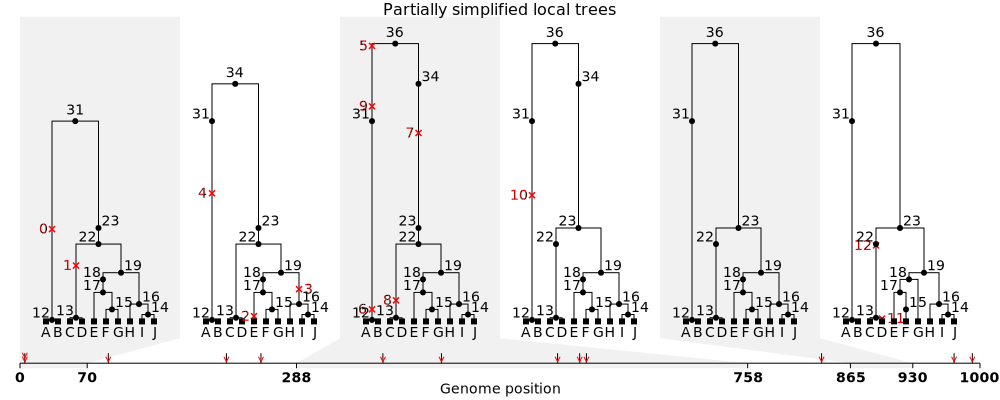

In [10]:
part_simp.draw_svg(
    size=(1000, 400),
    node_labels={nd.id: nd.metadata.get("label", nd.id) for nd in part_simp.nodes()},
    title="Partially simplified local trees"
)

In [11]:
display_quiz(Workbook1.url + "Q15.json")

<IPython.core.display.Javascript object>

## Full simplification

We can go one stage further by carrying out a "full simplification". This modifies edges so that, for example, the edge above node 22 in the first tree goes straight to node 31, rather than going via node 23. This will not change the general topology or branch lengths of the trees, and it also makes the trees simpler. However, it creates more edges (making ARG analysis less efficient), and slightly paradoxically, makes the graph visualization *less* simple:

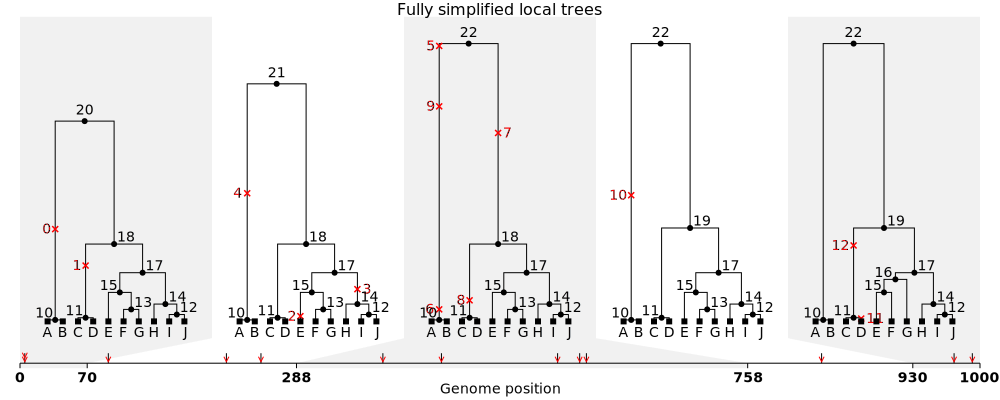

In [8]:
full_simp, node_map = arg.simplify(map_nodes=True)

display(full_simp.draw_svg(
    size=(1000, 400),
    node_labels={nd.id: nd.metadata.get("label", nd.id) for nd in full_simp.nodes()},
    title="Fully simplified local trees",
))

d3full_simp = create_styled_D3ARG(full_simp, "Xpos.json", node_map)
d3full_simp.draw(height=500, title="Fully simplified ARG")


As you can see above, the local trees look simpler, but the graph looks more tangled (although every node is now <b style="color:green">all-coalescent</b>). The fully-simplified ARG encodes exactly the same genetic information on the samples, and the same branch lengths in the local trees, but is less genealogically-informative about how adjacent trees relate to each other.

<dl class="exercise"><dt>Exercise K</dt>
    <dd>use the <code>.num_edges</code>, <code>.num_nodes</code>, <code>.num_trees</code>, and <code>.num_mutations</code> attributes to print out the number of edges, nodes, trees, and mutations in the <code>part_simp</code> ARG and the <code>full_simp</code> ARG (or you could simply <code>display</code> the summary table of each ARG).</dd>

In [10]:
# Complete Exercise K here

In [11]:
display_quiz(Workbook1.url + "Q16.json")

<IPython.core.display.Javascript object>

Because the number of sites and mutations has remained the same, and there is still a complete ancestry for all the samples, the encoded genetic variation and even branch-length calculations are the same between the full ARG and any of the simplified versions. This is easy to demonstrate:

In [12]:
print(f"    ====== Original (branch π: {arg.diversity(mode='branch'):.2f}) ========    ",
      f"    === Fully simplified (branch π: {full_simp.diversity(mode='branch'):.2f}) ===")
for v1, v2 in zip(arg.variants(), full_simp.variants()):
    print(
        f"pos {int(v1.site.position):>3}", v1.states(), "   ",
        f"pos {int(v2.site.position):>3}", v2.states()
    )


    ====== Original (branch π: 49091.80) ========         === Fully simplified (branch π: 49091.80) ===
pos   5 ['G' 'G' 'T' 'T' 'A' 'A' 'A' 'A' 'A' 'A']     pos   5 ['G' 'G' 'T' 'T' 'A' 'A' 'A' 'A' 'A' 'A']
pos  92 ['G' 'G' 'G' 'G' 'T' 'G' 'G' 'G' 'G' 'G']     pos  92 ['G' 'G' 'G' 'G' 'T' 'G' 'G' 'G' 'G' 'G']
pos 215 ['C' 'C' 'C' 'C' 'C' 'C' 'C' 'A' 'A' 'A']     pos 215 ['C' 'C' 'C' 'C' 'C' 'C' 'C' 'A' 'A' 'A']
pos 251 ['T' 'T' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']     pos 251 ['T' 'T' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
pos 378 ['G' 'G' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']     pos 378 ['G' 'G' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
pos 439 ['G' 'G' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']     pos 439 ['G' 'G' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C']
pos 560 ['C' 'C' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G']     pos 560 ['C' 'C' 'G' 'G' 'G' 'G' 'G' 'G' 'G' 'G']
pos 583 ['C' 'C' 'A' 'A' 'C' 'C' 'C' 'C' 'C' 'C']     pos 583 ['C' 'C' 'A' 'A' 'C' 'C' 'C' 'C' 'C' 'C']
pos 590 ['G' 'G' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']     pos 590 ['

Fully simplified ARGs are what you tend to get if you attempt to build trees along the genome, then join them together (e.g. as Relate does). For historical reasons, the fully simplified format is also the default output of the _msprime_ and _SLiM_ simulators, even though it is slightly less efficient.

<div class="alert alert-block alert-info"><b>Note:</b> The (new!) <i>tskit</i> <code>extend_haplotypes()</code> method attempts, mostly successfully, to infer missing non-coalescent regions of nodes, and place them back on the ARG.</div>

### Nodes represent genomes

Philosophically, the nodes in a simplified ARG no longer represent historical events, but the genomes that are produced as an *outcome* of those (unknown) events. For example, sample node 6 now has 2 parents, even though it does not itself represent a recombination event. We know a recombination event occured some time between the time of node 6 and the time of its youngest parent, node 15, but we can't say exactly when.

We can also use the `simplify()` method to identify the genome sequence at internal nodes:

### Simplifying with different focal nodes

One of the main uses of `simplify()` is to change which nodes are treated as samples. By default the This allows us to look at the genome of internal nodes in the ancestry, and emphasises that each node is a (possibly partially known) genome. For instance 

In [13]:
if part_simp.num_nodes != 23:
    raise RuntimeError("You have not yet partially simplified the arg with `filter_nodes=True`")
sample_ids_plus_node_21 = np.append(part_simp.samples(), 21)  # make node 21 the last "sampled genome"
new_arg = part_simp.simplify(sample_ids_plus_node_21)  # pretend that we have "sampled" node 21
print("Known variation for ancestral node 21")
for v in new_arg.variants():
    print(f"pos {int(v.site.position):>3}:   ", v.states(missing_data_string="-")[new_arg.num_samples - 1])

RuntimeError: You have not yet partially simplified the arg with `filter_nodes=True`

You can see that the start and end of the genome of node 21 is unknown (its haplotype is truncated).

In [17]:
display_quiz(Workbook1.url + "Q17.json")

<IPython.core.display.Javascript object>

#### Simplifying to reduce the sample size

If we choose a subset of the existing sample, we can reduct the ARG to reflect ****. This is the key operation in forward simulation *** etc.


<dl class="exercise"><dt>Exercise L</dt>
    <dd>Simplify the original ARG so that it only shows the ARG relating sample 0 (A)  to sample 6 (F). By default `simplify()` removes any sites that no longer have any mutations (are "monomorphic"). Set `filter_sites=False` to leave those sites in the resulting tree sequence.</dd></dl>

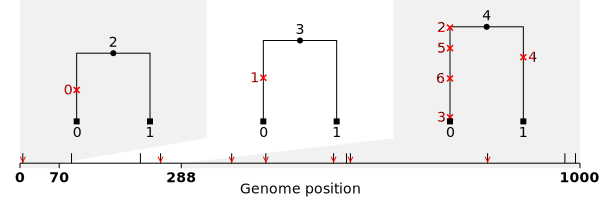

In [18]:
# Carry out exercise here

arg.simplify([0, 6], filter_sites=False).draw_svg()

In [19]:
display_quiz(Workbook1.url + "Q18.json")
Question: how many sites now have no mutations?

KeyError: 'Q18.json'

### Make link to PSMC.

TODO

### Undetectable nodes

Some ARG nodes may be theoretically knowable, but mutations do not provide enough information to detect them. 
In the same way that non-coalescent nodes can be removed, and their edges changed to reflect inheritance between the remaining genomes, if there is no evidence for a coalescent node, it can be removed

Importantly, however, unlike simplification, this will chanage the branch lengths in the local trees, and hence affect branch-length measures of genetic variation.

Using polytomies to represent uncertainty can help to construct a single representative ARG (rather than a set of ARGs in which coalescent orders have been randomly resolved), rather, but it can also cause 
Question: which are 

If we are to infer ARGs from data, we can treat unknowable events in two ways

1. Infer a large set of "representative" ARGs, by placing unknowable events randomly according to some model (e.g. SINGER) or calculating summaries that integrate across them (e.g. PSMC)
2. Infer a single ARG that simply omits the unknowable events (e.g. tsinfer) E.g. collapse coalescences.


We will focus on the second strategy ****




Incorporate https://github.com/tskit-dev/tskit/discussions/2926 into the workbook to define a collapse_unsupported_edges function (or something similar). Get the user to 

display_quiz(Workbook1.url + "Q19.json")

## Simulating ARGs

There are two basic approaches for simulating ancestry: forward and backward in time. Backward-time simulators such as _msprime_ are usually much faster but less flexible (for instance, it is hard to simulate anything but the simplest form of natural selection). Forward-time simulators such as _SLiM_ are more general, but must track the entire population during simulation, rather than simply following the ancestry of a small set of sample genomes.


Tree sequence files often have "provenance" data, which decribes how the file was made. You can see this when you display a tree sequence to the screen in a notebook: the list of provenances appears the bottom of the output.

In [20]:
arg

The provenances reveal that the _msprime_ software used to produce this ARG. 

### _Msprime_: a backward-time simulator

_Msprime_ is a fast and flexible backward-time simulator whose core functions are `sim_ancestry` and `sim_mutations`. The `sim_ancestry` command is run first and this creates the arg structure.

Running an _msprime_ simulation in Python is extremely easy. You simply need to call `sim_ancestry` with a number of (assumed diploid) samples. You'll usually want to provide a `sequence_length`, a `population_size` and a `recombination_rate` too:

In [21]:
ts = msprime.sim_ancestry(10, population_size=1e4, sequence_length=10_000, recombination_rate=2e-8)
print(f"Simulated a simplified ARG of {ts.num_samples} haploid genomes")

Simulated a simplified ARG of 20 haploid genomes


The command above generates a "fully simplifed" ARG of 10 diploid samples (20 haploids) over a 10kB genome, assuming a constant effective population size ($N_e$) of 10,000, and with a recombination rate of $2\times10^{-8}$ crossover mutations per base pair per generation. As the resulting ARG is stored in tree sequence format, we often name the resulting simulation `ts`. 

#### Demographic models

Of course, most populations have not stayed at a constant size over time, and are often modelled as multiple subpopulations. Instead of providing a `population_size` parameter, you can provide _msprime_ with a **demographic model**. This is how we simulated the original full ARG (for the curious, the details are in the `sim_ancestry` provenance entry, under "parameters" -> "demography"). The following code reads the demographic model from the full ARG's provenance, converts it to the portable [demes](https://popsim-consortium.github.io/demes-spec-docs/main/introduction.html) format, and plots it using the elegant [_demesdraw_](https://grahamgower.github.io/demesdraw/latest/) software:

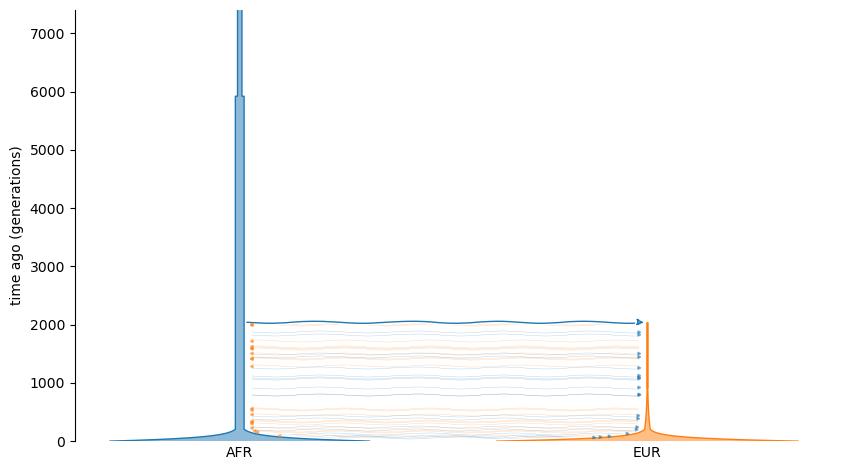

In [22]:
import demesdraw

cmd, parameters = msprime.provenance.parse_provenance(arg.provenance(0), arg)
assert cmd == "sim_ancestry"  # just check we have the right (zeroth) provenance entry
msprime_demography_object = parameters["demography"]
demesdraw.tubes(msprime_demography_object.to_demes(), log_time=False);

<dl class="exercise"><dt>Exercise M</dt>
    <dd>The widths on the X axis, indicating the two population sizes, is dominated by a rapid exponential increase in the past few hundred generations. Change <code>log_time</code> from <code>True</code> to <code>False</code> above, to zoom in on more recent times, and re-plot.</dd>
</dl>



In [23]:
display_quiz(Workbook1.url + "Q20.json")

<IPython.core.display.Javascript object>

### Running a larger simulation

We will rerun under the same demography, but simulate twenty times more of the genome (20kb). As we did in the original simulation, we will used the `record_full_arg` option to simulate a full ARG, rather than the simplified ARG that _msprime_ produces by default. Because there are two populations, we will 5 samples from each (for a total of 10 diploid samples), and use the original simulation recombination rate of $1.15\times10^{-8}$. We'll use a fixed `random_seed` to ensure that everyone gets the same results:


In [27]:
from datetime import datetime

n_diploids=10
genome_length=20_000  # bp

start_time = datetime.now()
larger_arg = msprime.sim_ancestry(
    samples={"AFR": n_diploids/2, "EUR": n_diploids/2},
    recombination_rate=1.15e-08,
    sequence_length=genome_length,
    demography=msprime_demography_object,
    record_full_arg=True,
    random_seed=321
)

print(f"Simulated a full ARG of {larger_arg.num_samples} haploid samples over "
      f"{larger_arg.sequence_length/1e3}kb in {datetime.now()-start_time} seconds")
print(
    f"ARG takes up {larger_arg.nbytes * 1e-6:.2f} MB, with {larger_arg.num_nodes} nodes "
    f"and {larger_arg.num_edges} edges, encoding {larger_arg.num_trees} trees\n")

# Calculate the number of "unknowable" nodes
non_coal = Workbook1.node_coalescence_status(larger_arg) == 0
p = (sum(non_coal)-larger_arg.num_samples)/(len(non_coal) - larger_arg.num_samples)
print(f'{p * 100:.2f}% of nodes in this full ARG are non-coalescent ("unknowable")')
print(f'{np.sum(larger_arg.nodes_flags & msprime.NODE_IS_RE_EVENT > 0)/ larger_arg.num_nodes * 100:.2f}% of nodes are RE nodes')


Simulated a full ARG of 20 haploid samples over 20.0kb in 0:00:00.010161 seconds
ARG takes up 0.02 MB, with 176 nodes and 283 edges, encoding 42 trees

68.59% of nodes in this full ARG are non-coalescent ("unknowable")
50.00% of nodes are RE nodes


You can see that this slightly larger ARG now has quite a high proportion of unknowable nodes.
Plotting this out as a complete ARG is possible, but maybe not very helpful (feel free to change the `edge_type` to `"ortho"` if you think it will help):

In [28]:
if larger_arg.num_edges > 10000:
    raise RuntimeError("ARG too big to plot!!!")
d3larger_arg = create_styled_D3ARG(larger_arg)
d3larger_arg.draw(
    height=800, width=800,
    title=f"ARG of {larger_arg.num_trees} trees",
    y_axis_labels={0:0, 0.5e4:0.5e4, 1e4:1e4, 1.5e4:1.5e4, 2e4:2e4, 2.5e4:2.5e4, 3e4:3e4})


As you can see, this ARG is rather too large to visualise, although it can be shrunk considerably by removing the ~70% of non-coalescent nodes (most of which are recombination nodes).

In [29]:
partial_or_always_coalescent_nodes = np.where(Workbook1.node_coalescence_status(larger_arg) > 0)[0]
focal_nodes = np.concatenate((larger_arg.samples(), partial_or_always_coalescent_nodes))
part_simp_arg = larger_arg.simplify(
    focal_nodes,  # The set of nodes whose ancestry we want to keep
    filter_nodes=False,  # Omit nodes from the genealogy, but do not completely remove them in the returned object    
    update_sample_flags=False,  # Usually all focal nodes are turned into samples, but we don't want that here
)

d3part_simp_arg = create_styled_D3ARG(part_simp_arg)
d3part_simp_arg.draw(height=1000, width=800, title="Simplified larger ARG")


<dl class="exercise"><dt>Exercise N</dt>
    <dd>Now repeat the simulation but edit the `genome_length` line to simulate 10 Mb of genome instead. Run the simulation (which could take a number of seconds). BE CAREFUL NOT TO PLOT THE RESULTING ARG (that will probably make your computer run out of memory and/or crash the browser).</dd></dl>

In [ ]:
Q: what percentage of the nodes in the 10 Mb full ARG are unknowable, to the nearest percent (99%)
Q: how much space does the 10Mb full ARG take up, to the nearest Mb? (535)
Q: how many trees (34048)

Rather than go through the hassle a simulating a full ARG, we can simply simulate an already-simplified ARG. This is much more efficient:

<dl class="exercise"><dt>Exercise O</dt>
    <dd>Finally, go back to the simulation code and change the `full_arg=True` parameter to `coalescing_segments_only=False`, and re-run the 10Mb genome simulation. Rather than simulating the full ARG, this only simulates the partial ARG, and so should be substantially faster.</dd></dl>

In [ ]:
Q: how much space does the new ARG take up to the nearest Mb (5)
Q: how many trees (30307)

## Mutations

We can add mutations *after* simulating ancestry using the [`msprime.sim_mutations()`](https://tskit.dev/msprime/docs/stable/mutations.html) function.

It is valid to add mutations *after* simulating the ARG as long as they are neutral. One of the main reasons that ARGs are an efficient way to simulate genomes is because most mutations are neutral, and therefore do not need to be tracked during ancestry simulation.

The default _msprime_ mutation model only adds single nucleotide changes, with equal probability of mutating between the 4 bases, but other sorts of mutation models [are available](https://tskit.dev/msprime/docs/stable/mutations.html#models).

In [31]:
mutated_large_arg = msprime.sim_mutations(larger_arg, rate=1e-8, random_seed=42)
print(f"Simulated {mutated_large_arg.num_mutations} mutations at {mutated_large_arg.num_sites} sites")

Simulated 19 mutations at 19 sites


In [44]:
display_quiz(Workbook1.url + "Q25.json")

<IPython.core.display.Javascript object>

# Possible exercise: print out all the variable sites for one of the samples. Note that this is not a full alignment (like a FASTA), but a concatenation of just the variable sites. To get an alignment, you need to associate a reference sequence with the ARG (sse docs)
next(mutated_large_arg,haplotypes(samples=[0]))

'0.3.0'

## Stdpopsim: easily run verified simulations

Even though the demographic model above is relatively simple, it still contains many parameters, and specifying it, or something similar, can be tricky and prone to error.

<img style="float:right; margin: 0.5em;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/NASA_Joins_Jane_Goodall_to_Conserve_Chimp_Habitats_%28SVS14410%29.jpg/330px-NASA_Joins_Jane_Goodall_to_Conserve_Chimp_Habitats_%28SVS14410%29.jpg" />
For this reason, rather than using <em>msprime</em> directly, it is often much easier to use the <a href="https://popsim-consortium.github.io/stdpopsim-docs/">Standard Library for Population Genetic Simulation Models</a> (<em>stdpopsim</em>). This is a set of tried and tested genomic and demographic models for various species. We will demonstrate using the Python API (as documented in the <a href="https://popsim-consortium.github.io/stdpopsim-docs/stable/tutorial.html#running-stdpopsim-with-the-python-interface-api">tutorial documentation</a>.

For instance, here is an example of a demographic model of populations in the genus <em>Pan</em> (common chimpanzees and bonobos).

Chosen the demographic model "BonoboGhost_4K19" for `Pan troglodytes` (Chimpanzee) out of 1 model(s) available:
* BonoboGhost_4K19: 
        Demographic model of ghost admixture into bonobos from
        Kuhlwilm et al. (2019) Supplementary Table S3 row 7.
        This model simulates four populations:
        western chimpanzees, central chimpanzees, bonobos,
        and a extinct ghost lineage. The ghost admixture event is
        modelled as a 1.7% pulse from the ghost lineage to bonobos.
        Migration events among western chimpanzees, central chimpanzees,
        and bonobos are modelled as single generation pulses.
        Populatio size changes are also modelled.
    


/Users/yan/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/demes/demes.py:1742: UserWarning: Multiple pulses are defined for the same deme(s) at time 6202.0. The ancestry proportions after this time will thus depend on the order in which the pulses have been specified. To avoid unexpected behaviour, the graph can instead be structured to introduce a new deme at this time with the desired ancestry proportions or to specify concurrent pulses with multiple sources.
  warnings.warn(
/Users/yan/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/demes/demes.py:1742: UserWarning: Multiple pulses are defined for the same deme(s) at time 4003.0. The ancestry proportions after this time will thus depend on the order in which the pulses have been specified. To avoid unexpected behaviour, the graph can instead be structured to introduce a new deme at this time with the desired ancestry proportions or to specify concurrent pulses with multiple sources.
  warning

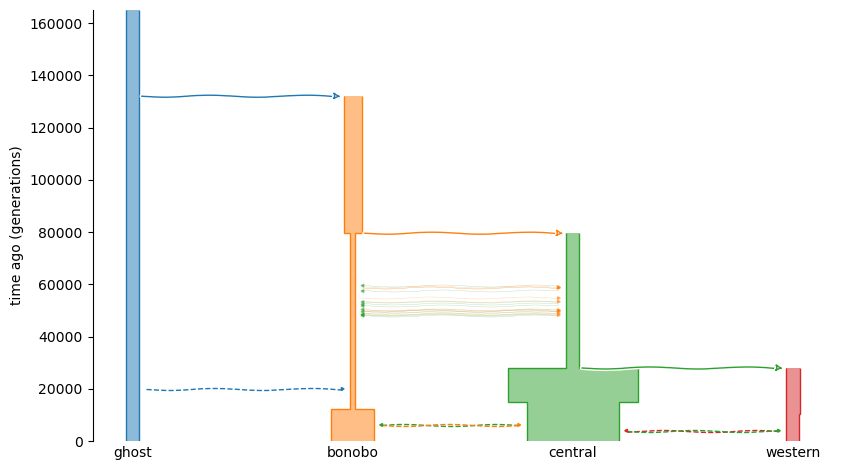

In [65]:
import stdpopsim
import demesdraw
species = stdpopsim.get_species("PanTro")  # /Pan troglodytes/
model = species.get_demographic_model("BonoboGhost_4K19")

print(
    f'Chosen the demographic model "{model.id}" for `{species.name}` ({species.common_name}) '
    f"out of {len(species.demographic_models)} model(s) available:")
for d in species.demographic_models:
    print(f"* {d.id}: {d.long_description}")

demesdraw.tubes(model.model.to_demes());

And here's how to tell _stdpopsim_ to run an _msprime_ simulation of the model,  e.g. the first 10 MB of [chromosome 2A](https://en.wikipedia.org/wiki/Chimpanzee_genome_project#Genes_of_the_chromosome_2_fusion_site), from 5 bonobos, 3 central chimpanzees, and 2 western chimpanzees (remember that these are diploid genomes, so that makes 20 haploid sample nodes in total). Mutations will be automatically laid onto the ARG using `msprime.sim_mutations()` (you'll notice that we provide a `mutation_rate` below).

In [43]:
contig = species.get_contig("chr2A", mutation_rate=model.mutation_rate, right=10e6)
samples = {"bonobo": 5, "central": 3, "western": 2}

engine = stdpopsim.get_engine("msprime")  # Use msprime as the underlying simulator
chimp_arg = engine.simulate(
    model,
    contig,
    samples,
    msprime_model="dtwf",
    msprime_change_model=[(20, "hudson")],
    coalescing_segments_only=False,
    random_seed=42,
)
print(f"Simulated a chimp ARG of {chimp_arg.num_samples} samples with {chimp_arg.num_trees} local trees")
chimp_arg = chimp_arg.trim()

Simulated a chimp ARG of 20 samples with 60581 local trees


The `model`, `contig` and `samples` parameters should be obvious. Here we have also used best practice and used the "Discrete-Time Wright Fisher" ([`dtwf`](https://tskit.dev/msprime/docs/stable/ancestry.html#sec-ancestry-models-dtwf)) coalescent model for the most recent 20 generations, and the (default) [`hudson`](https://tskit.dev/msprime/docs/stable/ancestry.html#sec-ancestry-models-hudson) model further back in time (this is mainly important for whole genome simulations or when sample sizes appraoch the population size, see [this paper](https://doi.org/10.1371/journal.pgen.1008619)).

Finally, any extra options are passed directly to the underlying simulation engine, in this case _msprime_. In particular, we have seen that the `coalescing_segments_only` argument will generate a partially- rather than fully-simplified ARG.

In [ ]:
#Exercise: plot the diversity along the genome 

TypeError: Index must be of integer type, not 'str'

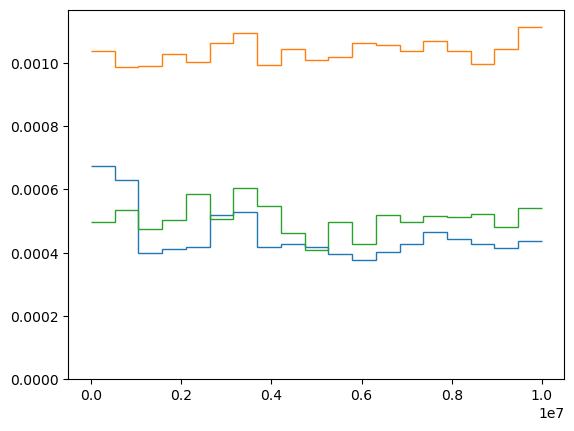

In [48]:
from matplotlib import pyplot as plt
import numpy as np

samples = {pop.metadata["name"]: pop.id for pop in chimp_arg.populations()}
windows = np.linspace(0, 10e6, 20)

plt.stairs(chimp_arg.diversity(chimp_arg.samples(pop_ids["bonobo"]), windows=windows), windows, baseline=None)
plt.stairs(chimp_arg.diversity(chimp_arg.samples(pop_ids["central"]), windows=windows), windows, baseline=None)
plt.stairs(chimp_arg.diversity(chimp_arg.samples(pop_ids["western"]), windows=windows), windows, baseline=None)

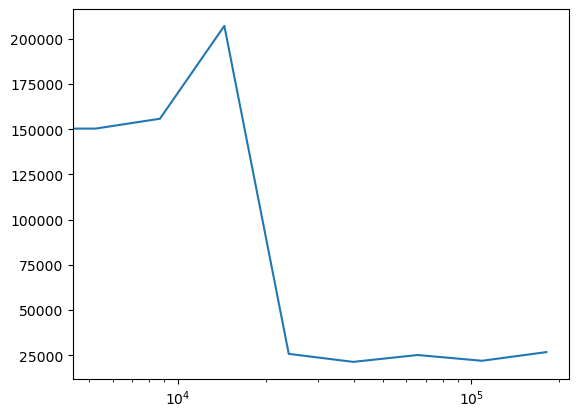

In [67]:
# Plot the coalescence density through time
time_windows = np.logspace(3.5, np.log10(chimp_arg.max_time), 10)
time_windows[0] = 0
time_windows[-1] = np.inf

pair_rates = chimp_arg.pair_coalescence_rates(
    time_windows=time_windows,
    sample_sets=[chimp_arg.samples(pop_ids["central"])]
)
plt.plot(time_windows[:-1], 1/pair_rates)
plt.xscale("log")

In [56]:
?chimp_arg.pair_coalescence_rates

Signature:
chimp_arg.pair_coalescence_rates(
    time_windows,
    sample_sets=None,
    indexes=None,
    windows=None,
)
Docstring:
Estimate the rate at which pairs of samples coalesce within time
windows, using the empirical cumulative distribution function (ecdf) of
pair coalescence times.  Assuming that pair coalescence events follow a
nonhomogeneous Poisson process, the empirical rate for a time window
:math:`[a, b)` where :math:`ecdf(b) < 1` is,

..math:

    log(1 - \frac{ecdf(b) - ecdf(a)}{1 - ecdf(a)}) / (a - b)

If the last coalescence event is within :math:`[a, b)`, so that
:math:`ecdf(b) = 1`, then an estimate of the empirical rate is

..math:

    (\mathbb{E}[t | t > a] - a)^{-1}

where :math:`\mathbb{E}[t | t < a]` is the average pair coalescence time
conditional on coalescence after the start of the last epoch.

The first breakpoint in `time_windows` must start at the age of the
samples, and the last must end at infinity. In the output array, any
time windows where all 

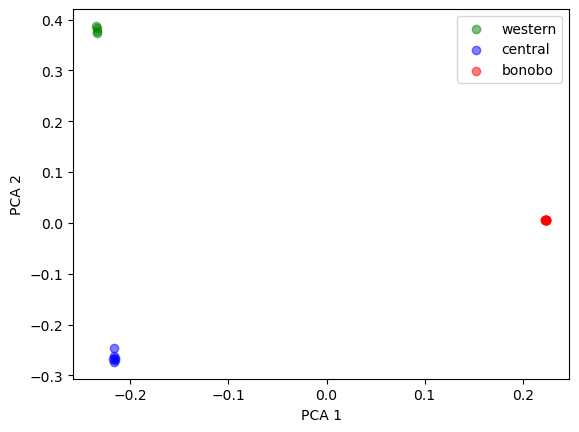

In [36]:

from matplotlib import pyplot as plt
principal_components = chimp_arg.pca(2).factors
colours = {"bonobo": "red", "central": "blue", "western": "green"}
for pop in chimp_arg.populations():
    samples = chimp_arg.samples(population=pop.id)
    if len(samples) > 0:
        plt.scatter(
            principal_components[samples, 0],
            principal_components[samples, 1],
            c=colours[pop.metadata["name"]],
            label=pop.metadata["name"],
            alpha=0.5,
        )
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()


TODO - illustrate either PCA through time or PCA along the genome in the plot above, and add a question

## SLiM simulations

SLiM is a separate program that won't work in the browser, so we can't perform forward-time simulations easily in this workbook. Instead, we'll load up the results of a previous SLiM simulation 

In [50]:
## Recapitation (using a pre-saved SLiM simulation

In [ ]:
# Example using PCA

In [ ]:
demography

In [ ]:
## Demography in msprime

In [ ]:
contig = species.get_contig("chr22")
samples = {"YRI": 5, "CHB": 5, "CEU": 0}


In [ ]:
## Recapitation

